In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/scratch/phys/sin/sethih1/Extended_TERS_data/run_planar_again/planar_comparison_viz/all_scores.csv')

In [4]:
df.head()

,filename,dice,iou,num_atoms,planarity_rms,rmsd,suffix,rms
0,10028,0.786858,0.648611,14,0.999875,0.000459,train,0.05
1,100397,0.851523,0.741436,19,0.999730,0.000733,train,0.05
2,100489,0.831378,0.711417,26,0.999216,0.003026,train,0.05
3,100599,0.856370,0.748818,18,0.999452,0.001469,train,0.05
4,100604,0.873579,0.775535,26,0.999515,0.001664,train,0.05


In [5]:
df[df['rms'] == 0.05]

,filename,dice,iou,num_atoms,planarity_rms,rmsd,suffix,rms
0,10028,0.786858,0.648611,14,0.999875,0.000459,train,0.05
1,100397,0.851523,0.741436,19,0.999730,0.000733,train,0.05
2,100489,0.831378,0.711417,26,0.999216,0.003026,train,0.05
3,100599,0.856370,0.748818,18,0.999452,0.001469,train,0.05
4,100604,0.873579,0.775535,26,0.999515,0.001664,train,0.05
...,...,...,...,...,...,...,...,...
18296,90670,0.904110,0.825000,15,0.999952,0.000119,test,0.05
18297,9219,0.898831,0.816252,15,0.999856,0.000340,test,0.05
18298,9228,0.903001,0.823156,14,0.999929,0.000165,test,0.05
18299,931,0.918333,0.848997,18,0.999835,0.000434,test,0.05


In [6]:
df[df['rmsd'] < 0.5]['rms']

0        0.05
1        0.05
2        0.05
3        0.05
4        0.05
         ... 
20127    1.00
20128    1.00
20129    1.00
20130    1.00
20131    1.00
Name: rms, Length: 19578, dtype: float64

In [7]:
df[(df['rmsd'] < 0.5) & (df['rmsd'] > 0.1)]['rms'].describe()

count    11432.000000
mean         0.750000
std          0.250011
min          0.500000
25%          0.500000
50%          0.750000
75%          1.000000
max          1.000000
Name: rms, dtype: float64

In [8]:
# Summary statistics by train/test split
summary_by_split = df.groupby('suffix')[['dice', 'iou', 'num_atoms', 'planarity_rms', 'rmsd']].agg(['mean', 'std', 'min', 'max', 'median'])
print("Statistics by Train/Test Split:")
summary_by_split

Statistics by Train/Test Split:


dice                                          iou                 \
            mean       std  min       max    median      mean       std  min   
suffix                                                                         
test    0.775605  0.147192  0.0  0.952941  0.827470  0.653271  0.167027  0.0   
train   0.813188  0.109292  0.0  0.987805  0.848262  0.697419  0.134302  0.0   
val     0.776354  0.139758  0.0  0.993865  0.821624  0.652580  0.160755  0.0   

                            ... planarity_rms                           \
             max    median  ...          mean       std       min  max   
suffix                      ...                                          
test    0.910112  0.705713  ...      0.926015  0.070312  0.523369  1.0   
train   0.975904  0.736505  ...      0.924902  0.070463  0.398010  1.0   
val     0.987805  0.697251  ...      0.923752  0.068587  0.591374  1.0   

                      rmsd                                     
          median      mean       std  min       max    median  
suffix                                                         
test    0.923944  0.212692  0.186786  0.0  0.528582  0.257166  
train   0.922435  0.217151  0.186600  0.0  0.529170  0.262270  
val     0.919999  0.223076  0.186820  0.0  0.528426  0.270636  

[3 rows x 25 columns]

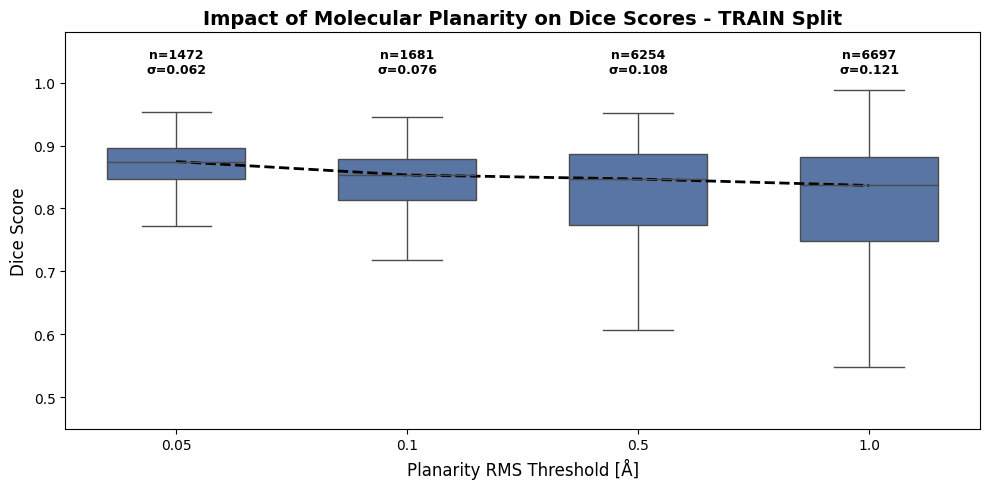


TRAIN Split - Impact of Molecular Planarity on Dice Scores
RMS Bin         Count      Mean       Median     Std        Min        Max       
----------------------------------------------------------------------
0.05            1472       0.8616    0.8745    0.0622    0.0000    0.9532
0.1             1681       0.8335    0.8533    0.0765    0.0000    0.9459
0.5             6254       0.8136    0.8468    0.1080    0.0000    0.9524
1.0             6697       0.7971    0.8366    0.1210    0.0000    0.9878
----------------------------------------------------------------------


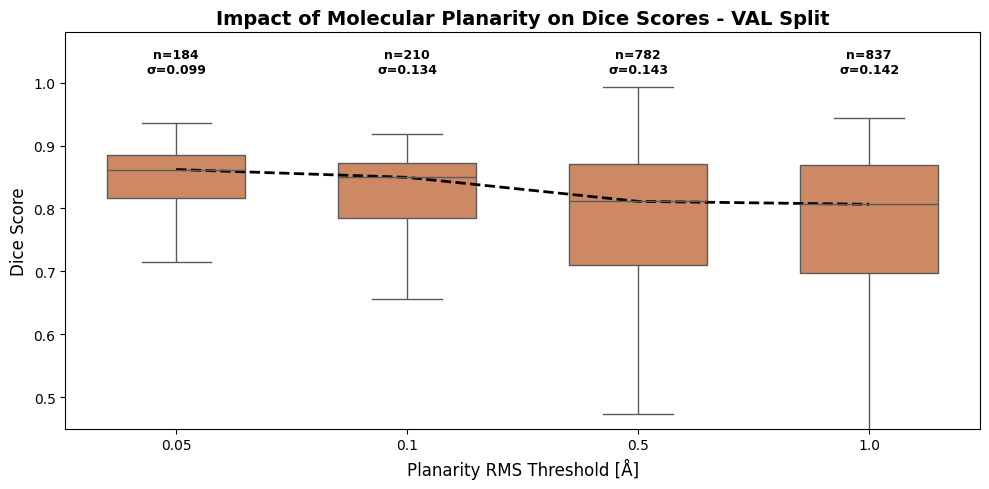


VAL Split - Impact of Molecular Planarity on Dice Scores
RMS Bin         Count      Mean       Median     Std        Min        Max       
----------------------------------------------------------------------
0.05            184        0.8332    0.8619    0.0995    0.0000    0.9355
0.1             210        0.8024    0.8495    0.1339    0.0000    0.9184
0.5             782        0.7670    0.8113    0.1431    0.0919    0.9939
1.0             837        0.7660    0.8067    0.1420    0.0417    0.9435
----------------------------------------------------------------------


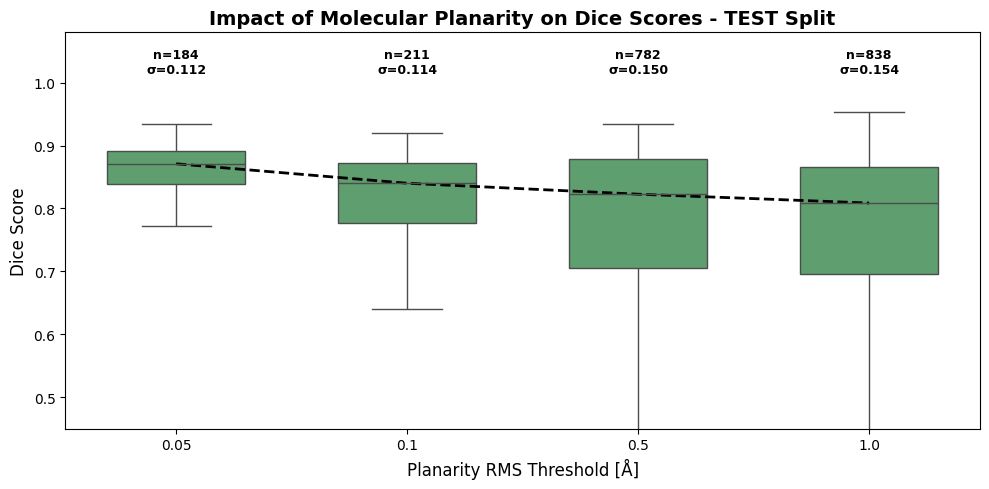


TEST Split - Impact of Molecular Planarity on Dice Scores
RMS Bin         Count      Mean       Median     Std        Min        Max       
----------------------------------------------------------------------
0.05            184        0.8418    0.8710    0.1120    0.0000    0.9343
0.1             211        0.8032    0.8401    0.1142    0.0000    0.9200
0.5             782        0.7715    0.8227    0.1501    0.0000    0.9338
1.0             838        0.7580    0.8086    0.1537    0.0441    0.9529
----------------------------------------------------------------------


In [9]:
# Impact of Molecular Planarity on Dice Scores - Separate plots for Train/Val/Test
# Each RMS bin represents a separate category of molecules

import numpy as np
import seaborn as sns

# The 'rms' column represents different planarity threshold groups (not cumulative)
rms_bins = sorted(df['rms'].unique())  # [0.05, 0.1, 0.5, 1.0]
rms_labels = [str(r) for r in rms_bins]

# Create separate plots for each split
splits = ['train', 'val', 'test']
colors = {'train': '#4C72B0', 'val': '#DD8452', 'test': '#55A868'}

for split in splits:
    df_split = df[df['suffix'] == split]
    
    if len(df_split) == 0:
        print(f"No data for {split} split")
        continue
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Calculate medians and stats for each RMS bin
    medians = []
    stds = []
    counts = []
    
    for rms_val in rms_bins:
        subset = df_split[df_split['rms'] == rms_val]['dice']
        medians.append(subset.median())
        stds.append(subset.std())
        counts.append(len(subset))
    
    # Create boxplot without outliers
    bp = sns.boxplot(data=df_split, x='rms', y='dice', ax=ax, 
                     order=rms_bins, color=colors[split], width=0.6,
                     fliersize=0)
    
    # Add median trend line (dotted)
    x_positions = range(len(rms_bins))
    ax.plot(x_positions, medians, 'k--', linewidth=2, markersize=0)
    
    # Add sample counts and variance info at the top of the plot
    for i, (rms_val, count, std) in enumerate(zip(rms_bins, counts, stds)):
        ax.text(i, 1.01, f'n={count}\nσ={std:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    # Formatting
    ax.set_xlabel('Planarity RMS Threshold [Å]', fontsize=12)
    ax.set_ylabel('Dice Score', fontsize=12)
    ax.set_title(f'Impact of Molecular Planarity on Dice Scores - {split.upper()} Split', 
                 fontsize=14, fontweight='bold')
    ax.set_ylim(0.45, 1.08)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics for this split
    print(f"\n{'='*70}")
    print(f"{split.upper()} Split - Impact of Molecular Planarity on Dice Scores")
    print("="*70)
    print(f"{'RMS Bin':<15} {'Count':<10} {'Mean':<10} {'Median':<10} {'Std':<10} {'Min':<10} {'Max':<10}")
    print("-" * 70)
    for rms_val in rms_bins:
        subset = df_split[df_split['rms'] == rms_val]['dice']
        print(f"{rms_val:<15} {len(subset):<10} {subset.mean():.4f}    {subset.median():.4f}    {subset.std():.4f}    {subset.min():.4f}    {subset.max():.4f}")
    print("-" * 70)

In [10]:
pwd

'/home/sethih1/masque_new/ters_gen/notebooks'

Saved: fig_plots/extended_dataset_train.pdf


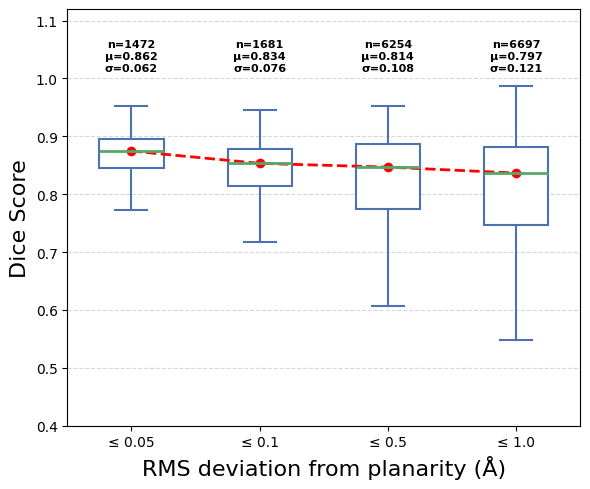

Saved: fig_plots/extended_dataset_val.pdf


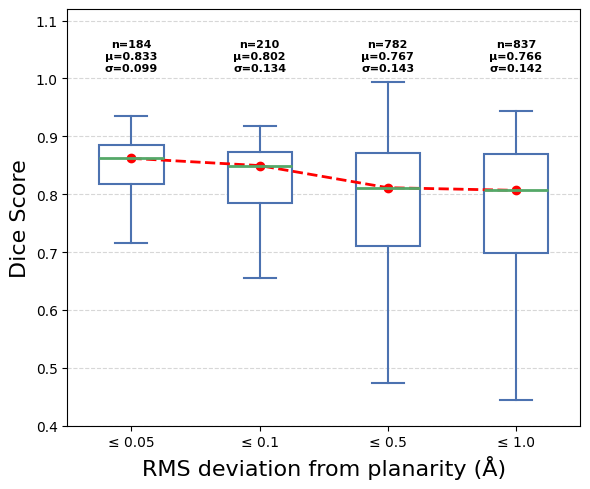

Saved: fig_plots/extended_dataset_test.pdf


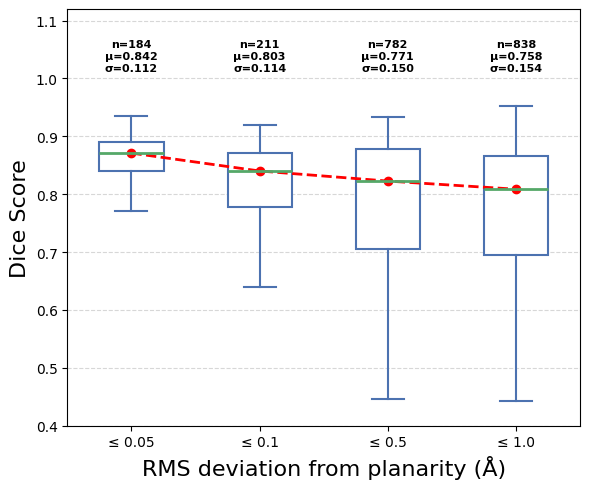

In [24]:
# Impact of Molecular Planarity on Dice Scores - Simple Style (White boxes with Blue edges, Green median lines)
import numpy as np
import seaborn as sns

# The 'rms' column represents different planarity threshold groups (not cumulative)
rms_bins = sorted(df['rms'].unique())  # [0.05, 0.1, 0.5, 1.0]

# Create separate plots for each split
splits = ['train', 'val', 'test']

for split in splits:
    df_split = df[df['suffix'] == split]
    
    if len(df_split) == 0:
        print(f"No data for {split} split")
        continue
    
    # Create figure
    fig, ax = plt.subplots(figsize=(6, 5))
    
    # Calculate medians and stats for each RMS bin
    medians = []
    means = []
    stds = []
    counts = []
    
    for rms_val in rms_bins:
        subset = df_split[df_split['rms'] == rms_val]['dice']
        medians.append(subset.median())
        means.append(subset.mean())
        stds.append(subset.std())
        counts.append(len(subset))
    
    # Create boxplot with simple style
    bp = ax.boxplot([df_split[df_split['rms'] == r]['dice'] for r in rms_bins],
                    positions=range(len(rms_bins)), widths=0.5,
                    patch_artist=True, showfliers=False)
    
    # Style the boxes - white fill with blue edges, green median lines
    for box in bp['boxes']:
        box.set_facecolor('white')
        box.set_edgecolor('#4C72B0')  # Blue edges
        box.set_linewidth(1.5)
    for whisker in bp['whiskers']:
        whisker.set_color('#4C72B0')  # Blue whiskers
        whisker.set_linewidth(1.5)
    for cap in bp['caps']:
        cap.set_color('#4C72B0')  # Blue caps
        cap.set_linewidth(1.5)
    for median in bp['medians']:
        median.set_color('#55A868')  # Green
        median.set_linewidth(2)
    
    # Add red dotted median trend line
    x_positions = range(len(rms_bins))
    ax.plot(x_positions, medians, 'r--', linewidth=2, marker='o', markersize=6)
    
    # Set x-axis labels with ≤ symbol
    ax.set_xticks(range(len(rms_bins)))
    ax.set_xticklabels([f'≤ {r}' for r in rms_bins])
    
    # Add sample counts, mean, and variance at the top
    for i, (count, mean, std) in enumerate(zip(counts, means, stds)):
        ax.text(i, 1.01, f'n={count}\nμ={mean:.3f}\nσ={std:.3f}', ha='center', va='bottom', fontsize=8, fontweight='bold')
    
    # Formatting
    ax.set_xlabel('RMS deviation from planarity (Å)', fontsize=16)
    ax.set_ylabel('Dice Score', fontsize=16)
    #ax.set_title(f'Impact of Molecular Planarity on Dice Scores - {split.upper()} Split', 
    #             fontsize=14, fontweight='bold')
    ax.set_ylim(0.4, 1.12)
    
    # Add grid
    ax.grid(True, axis='y', linestyle='--', alpha=0.5)
    ax.set_axisbelow(True)
    
    plt.tight_layout()
    
    # Save as transparent PDF
    fig.savefig(f'./fig_plots/extended_dataset_{split}.pdf', transparent=True, bbox_inches='tight')
    print(f"Saved: fig_plots/extended_dataset_{split}.pdf")
    
    plt.show()

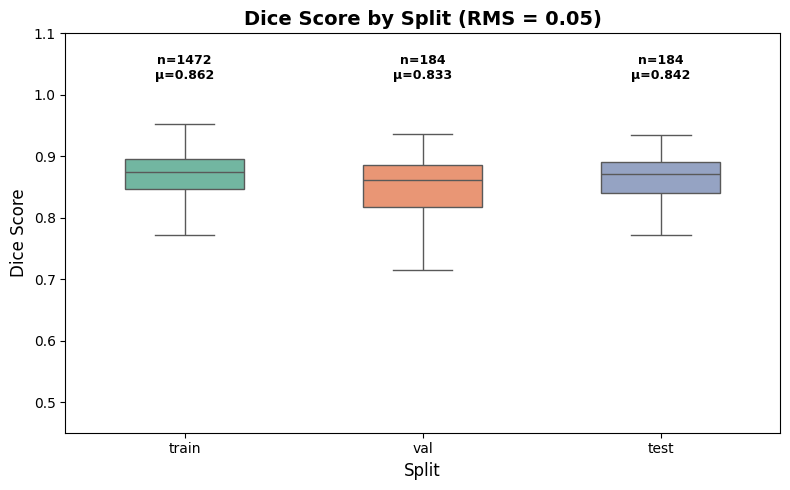


Summary Statistics for RMS = 0.05:
        count      mean    median       std
suffix                                     
train    1472  0.861619  0.874523  0.062229
val       184  0.833152  0.861917  0.099497
test      184  0.841844  0.871034  0.112043


In [12]:
# Dice Score by Split for RMS = 0.05 (Most Planar Molecules)
import seaborn as sns

rms_val = 0.05
df_rms = df[df['rms'] == rms_val]

fig, ax = plt.subplots(figsize=(8, 5))

# Create boxplot
sns.boxplot(data=df_rms, x='suffix', y='dice', ax=ax, 
            order=['train', 'val', 'test'], hue='suffix',
            palette='Set2', width=0.5, fliersize=0, legend=False)

# Add sample counts
for i, split in enumerate(['train', 'val', 'test']):
    subset = df_rms[df_rms['suffix'] == split]['dice']
    count = len(subset)
    mean_val = subset.mean()
    ax.text(i, 1.02, f'n={count}\nμ={mean_val:.3f}', ha='center', va='bottom', 
            fontsize=9, fontweight='bold')

ax.set_xlabel('Split', fontsize=12)
ax.set_ylabel('Dice Score', fontsize=12)
ax.set_title(f'Dice Score by Split (RMS = {rms_val})', fontsize=14, fontweight='bold')
ax.set_ylim(0.45, 1.1)

plt.tight_layout()
plt.show()

# Print summary
print(f"\nSummary Statistics for RMS = {rms_val}:")
summary = df_rms.groupby('suffix')['dice'].agg(['count', 'mean', 'median', 'std'])
print(summary.reindex(['train', 'val', 'test']))

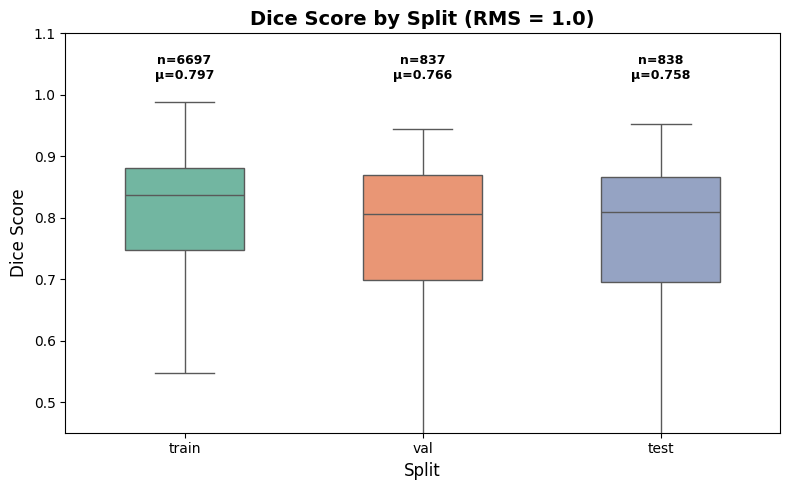


Summary Statistics for RMS = 1.0:
        count      mean    median       std
suffix                                     
train    6697  0.797095  0.836570  0.120976
val       837  0.766044  0.806676  0.141971
test      838  0.757966  0.808639  0.153661


In [13]:
# Dice Score by Split for RMS = 1.0 (Least Planar Molecules)

rms_val = 1.0
df_rms = df[df['rms'] == rms_val]

fig, ax = plt.subplots(figsize=(8, 5))

# Create boxplot
sns.boxplot(data=df_rms, x='suffix', y='dice', ax=ax, 
            order=['train', 'val', 'test'], hue='suffix',
            palette='Set2', width=0.5, fliersize=0, legend=False)

# Add sample counts
for i, split in enumerate(['train', 'val', 'test']):
    subset = df_rms[df_rms['suffix'] == split]['dice']
    count = len(subset)
    mean_val = subset.mean()
    ax.text(i, 1.02, f'n={count}\nμ={mean_val:.3f}', ha='center', va='bottom', 
            fontsize=9, fontweight='bold')

ax.set_xlabel('Split', fontsize=12)
ax.set_ylabel('Dice Score', fontsize=12)
ax.set_title(f'Dice Score by Split (RMS = {rms_val})', fontsize=14, fontweight='bold')
ax.set_ylim(0.45, 1.1)

plt.tight_layout()
plt.show()

# Print summary
print(f"\nSummary Statistics for RMS = {rms_val}:")
summary = df_rms.groupby('suffix')['dice'].agg(['count', 'mean', 'median', 'std'])
print(summary.reindex(['train', 'val', 'test']))

/tmp/ipykernel_4140305/1286188035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='rms', y='rmsd', ax=ax,


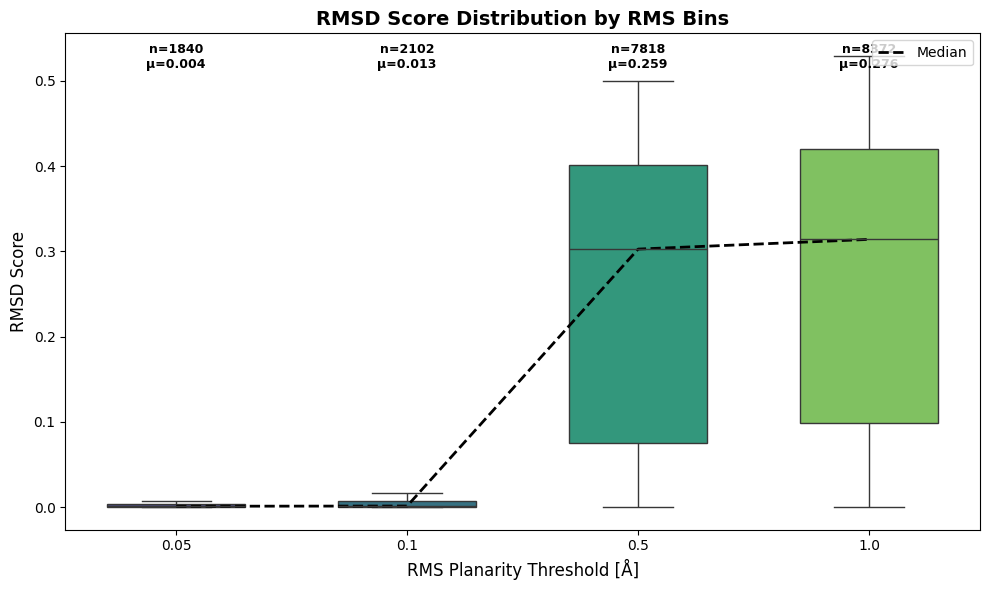


RMSD Statistics by RMS Bins:
RMS Bin      Count      Mean       Median     Std        Min        Max       
----------------------------------------------------------------------
0.05         1840       0.0041    0.0010    0.0083    0.0000    0.0498
0.1          2102       0.0131    0.0012    0.0256    0.0000    0.1000
0.5          7818       0.2593    0.3026    0.1700    0.0000    0.5000
1.0          8372       0.2762    0.3140    0.1761    0.0000    0.5292
----------------------------------------------------------------------


In [14]:
# RMSD Score vs RMS Bins
import numpy as np
import seaborn as sns

# Get unique RMS values (bins)
rms_bins = sorted(df['rms'].unique())
rms_labels = [str(r) for r in rms_bins]

fig, ax = plt.subplots(figsize=(10, 6))

# Create boxplot of RMSD by RMS bins
sns.boxplot(data=df, x='rms', y='rmsd', ax=ax, 
            order=rms_bins, palette='viridis', width=0.6, fliersize=0)

# Calculate and plot medians with trend line
medians = [df[df['rms'] == r]['rmsd'].median() for r in rms_bins]
means = [df[df['rms'] == r]['rmsd'].mean() for r in rms_bins]
x_positions = range(len(rms_bins))
ax.plot(x_positions, medians, 'k--', linewidth=2, label='Median')

# Add sample counts and statistics at the top
for i, rms_val in enumerate(rms_bins):
    subset = df[df['rms'] == rms_val]['rmsd']
    count = len(subset)
    mean_val = subset.mean()
    std_val = subset.std()
    ax.text(i, ax.get_ylim()[1] * 0.98, f'n={count}\nμ={mean_val:.3f}', 
            ha='center', va='top', fontsize=9, fontweight='bold')

# Formatting
ax.set_xlabel('RMS Planarity Threshold [Å]', fontsize=12)
ax.set_ylabel('RMSD Score', fontsize=12)
ax.set_title('RMSD Score Distribution by RMS Bins', fontsize=14, fontweight='bold')
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nRMSD Statistics by RMS Bins:")
print("="*70)
print(f"{'RMS Bin':<12} {'Count':<10} {'Mean':<10} {'Median':<10} {'Std':<10} {'Min':<10} {'Max':<10}")
print("-" * 70)
for rms_val in rms_bins:
    subset = df[df['rms'] == rms_val]['rmsd']
    print(f"{rms_val:<12} {len(subset):<10} {subset.mean():.4f}    {subset.median():.4f}    {subset.std():.4f}    {subset.min():.4f}    {subset.max():.4f}")
print("-" * 70)

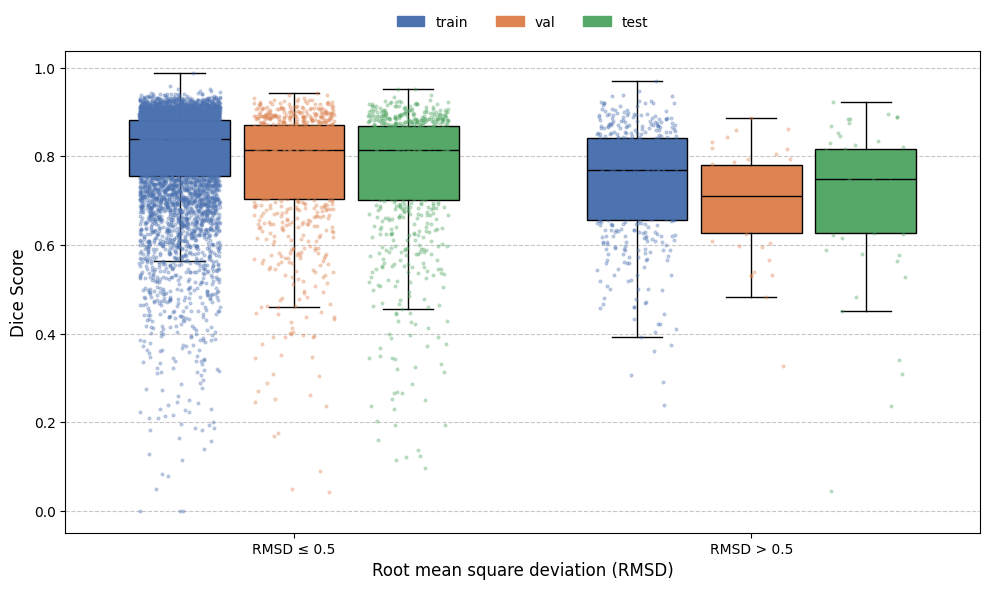


Summary Statistics for RMS = 1.0, split by RMSD:

RMSD ≤ 0.5:
        count      mean    median       std
suffix                                     
train    6246  0.801064  0.839557  0.119581
val       791  0.770136  0.814090  0.142385
test      781  0.761962  0.815436  0.151587

RMSD > 0.5:
        count      mean    median       std
suffix                                     
train     451  0.742130  0.768421  0.126799
val        46  0.695690  0.711282  0.114815
test       57  0.703211  0.748582  0.171971


In [ ]:
# Dice Score by Split for RMS = 1.0, split by RMSD threshold (≤0.5 vs >0.5)
import matplotlib.patches as mpatches

rms_val = 1.0
df_rms = df[df['rms'] == rms_val].copy()

# Create RMSD category column
df_rms['rmsd_category'] = df_rms['rmsd'].apply(lambda x: 'RMSD ≤ 0.5' if x <= 0.5 else 'RMSD > 0.5')

fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for splits
split_colors = {'train': '#4C72B0', 'val': '#DD8452', 'test': '#55A868'}  # blue, orange, green

rmsd_categories = ['RMSD ≤ 0.5', 'RMSD > 0.5']
splits = ['train', 'val', 'test']

# Manual positioning for perfect alignment
box_width = 0.22
offsets = [-0.25, 0, 0.25]  # Offsets for train, val, test within each category

# Draw boxplots and stripplots manually for each group
for cat_idx, rmsd_cat in enumerate(rmsd_categories):
    for split_idx, split in enumerate(splits):
        subset = df_rms[(df_rms['rmsd_category'] == rmsd_cat) & (df_rms['suffix'] == split)]['dice']
        x_pos = cat_idx + offsets[split_idx]
        
        if len(subset) > 0:
            # Draw boxplot
            bp = ax.boxplot(subset, positions=[x_pos], widths=box_width, 
                           patch_artist=True, showfliers=False)
            bp['boxes'][0].set_facecolor(split_colors[split])
            bp['boxes'][0].set_edgecolor('black')
            bp['medians'][0].set_color('black')
            
            # Draw stripplot (jittered points)
            jitter = np.random.uniform(-box_width/2.5, box_width/2.5, len(subset))
            ax.scatter(x_pos + jitter, subset, color=split_colors[split], 
                      alpha=0.3, s=4, zorder=3)

# Set x-axis labels
ax.set_xticks([0, 1])
ax.set_xticklabels(rmsd_categories)

# Create legend manually - positioned outside figure on top
legend_patches = [mpatches.Patch(color=split_colors[s], label=s) for s in splits]
ax.legend(handles=legend_patches, loc='lower center', ncol=3, bbox_to_anchor=(0.5, 1.02), frameon=False)

ax.set_xlabel('Root mean square deviation (RMSD)', fontsize=12)
ax.set_ylabel('Dice Score', fontsize=12)
#ax.set_title(f'Dice Score by Split (RMS = {rms_val}) - RMSD Comparison', fontsize=14, fontweight='bold', pad=30)
ax.set_xlim(-0.5, 1.5)

# Add grid
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

# Print summary
print("\nSummary Statistics for RMS = 1.0, split by RMSD:")
print("="*70)
for rmsd_cat in rmsd_categories:
    print(f"\n{rmsd_cat}:")
    df_subset = df_rms[df_rms['rmsd_category'] == rmsd_cat]
    summary = df_subset.groupby('suffix')['dice'].agg(['count', 'mean', 'median', 'std'])
    print(summary.reindex(['train', 'val', 'test']))

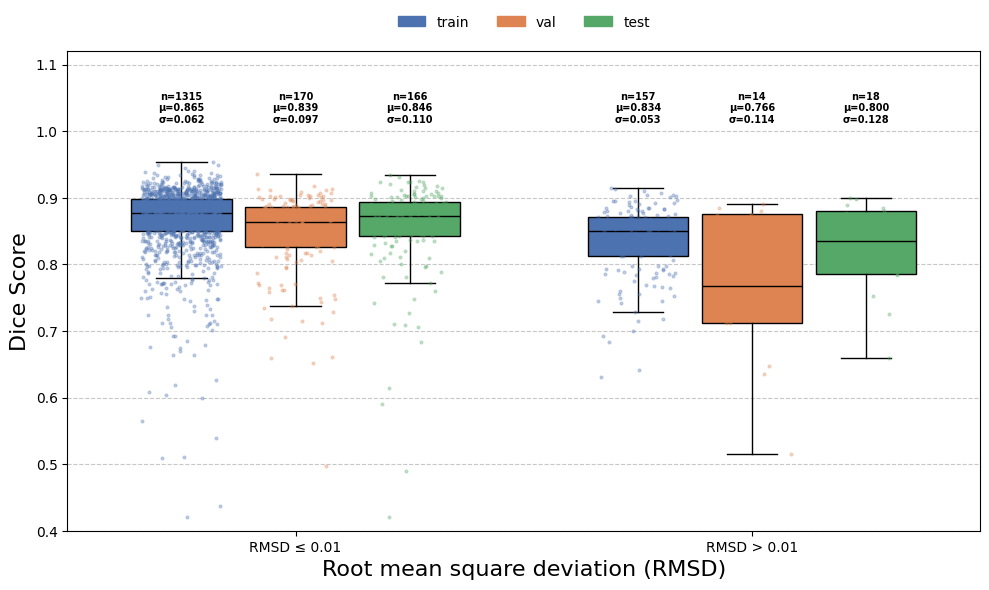


Summary Statistics for RMS = 0.05, split by RMSD:

RMSD ≤ 0.01:
        count      mean    median       std
suffix                                     
train    1315  0.864898  0.877546  0.062417
val       170  0.838682  0.863012  0.096550
test      166  0.846337  0.872198  0.109655

RMSD > 0.01:
        count      mean    median       std
suffix                                     
train     157  0.834155  0.849858  0.053382
val        14  0.766009  0.768110  0.113660
test       18  0.800413  0.835163  0.128127


In [30]:
# Dice Score by Split for RMS = 0.05, split by RMSD threshold (≤0.01 vs >0.01)
import matplotlib.patches as mpatches

rms_val = 0.05
df_rms = df[df['rms'] == rms_val].copy()

# Create RMSD category column
df_rms['rmsd_category'] = df_rms['rmsd'].apply(lambda x: 'RMSD ≤ 0.01' if x <= 0.01 else 'RMSD > 0.01')

fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for splits
split_colors = {'train': '#4C72B0', 'val': '#DD8452', 'test': '#55A868'}  # blue, orange, green

rmsd_categories = ['RMSD ≤ 0.01', 'RMSD > 0.01']
splits = ['train', 'val', 'test']

# Manual positioning for perfect alignment
box_width = 0.22
offsets = [-0.25, 0, 0.25]  # Offsets for train, val, test within each category

# Draw boxplots and stripplots manually for each group
for cat_idx, rmsd_cat in enumerate(rmsd_categories):
    for split_idx, split in enumerate(splits):
        subset = df_rms[(df_rms['rmsd_category'] == rmsd_cat) & (df_rms['suffix'] == split)]['dice']
        x_pos = cat_idx + offsets[split_idx]
        
        if len(subset) > 0:
            # Draw boxplot
            bp = ax.boxplot(subset, positions=[x_pos], widths=box_width, 
                           patch_artist=True, showfliers=False)
            bp['boxes'][0].set_facecolor(split_colors[split])
            bp['boxes'][0].set_edgecolor('black')
            bp['medians'][0].set_color('black')
            
            # Draw stripplot (jittered points)
            jitter = np.random.uniform(-box_width/2.5, box_width/2.5, len(subset))
            ax.scatter(x_pos + jitter, subset, color=split_colors[split], 
                      alpha=0.3, s=4, zorder=3)
            
            # Add n, μ, and σ annotations at the top
            ax.text(x_pos, 1.01, f'n={len(subset)}\nμ={subset.mean():.3f}\nσ={subset.std():.3f}', 
                    ha='center', va='bottom', fontsize=7, fontweight='bold')

# Set x-axis labels
ax.set_xticks([0, 1])
ax.set_xticklabels(rmsd_categories)

# Create legend - positioned outside the figure, above the plot
legend_patches = [mpatches.Patch(color=split_colors[s], label=s) for s in splits]
ax.legend(handles=legend_patches, loc='lower center', ncol=3, bbox_to_anchor=(0.5, 1.02), frameon=False)

ax.set_xlabel('Root mean square deviation (RMSD)', fontsize=16)
ax.set_ylabel('Dice Score', fontsize=16)
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(0.4, 1.12)

# Add grid
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig(f'./fig_plots/rmsd.png', transparent=True, bbox_inches='tight')
plt.show()

# Print summary
print("\nSummary Statistics for RMS = 0.05, split by RMSD:")
print("="*70)

for rmsd_cat in rmsd_categories:
    print(f"\n{rmsd_cat}:")
    df_subset = df_rms[df_rms['rmsd_category'] == rmsd_cat]
    summary = df_subset.groupby('suffix')['dice'].agg(['count', 'mean', 'median', 'std'])
    print(summary.reindex(['train', 'val', 'test']))

In [21]:
# Mean Dice Score for Train, Test, Val across different RMS categories
import pandas as pd

rms_bins = sorted(df['rms'].unique())
splits = ['train', 'val', 'test']

# Create a summary table
summary_data = []
for rms_val in rms_bins:
    row = {'RMS': f'≤ {rms_val}'}
    for split in splits:
        subset = df[(df['rms'] == rms_val) & (df['suffix'] == split)]['dice']
        row[f'{split}_mean'] = subset.mean()
        row[f'{split}_count'] = len(subset)
    summary_data.append(row)

summary_df = pd.DataFrame(summary_data)

# Display formatted table
print("Mean Dice Score by RMS Category and Split")
print("=" * 70)
print(f"{'RMS':<12} {'Train':<18} {'Val':<18} {'Test':<18}")
print(f"{'Category':<12} {'Mean (n)':<18} {'Mean (n)':<18} {'Mean (n)':<18}")
print("-" * 70)

for _, row in summary_df.iterrows():
    print(f"{row['RMS']:<12} {row['train_mean']:.4f} (n={int(row['train_count']):<4})  {row['val_mean']:.4f} (n={int(row['val_count']):<4})  {row['test_mean']:.4f} (n={int(row['test_count']):<4})")

print("-" * 70)

# Also display as a clean DataFrame
pivot_df = df.groupby(['rms', 'suffix'])['dice'].mean().unstack()
pivot_df = pivot_df[['train', 'val', 'test']]
pivot_df.index = [f'≤ {r}' for r in pivot_df.index]
print("\n\nMean Dice Score Table:")
print(pivot_df.round(4))

Mean Dice Score by RMS Category and Split
RMS          Train              Val                Test              
Category     Mean (n)           Mean (n)           Mean (n)          
----------------------------------------------------------------------
≤ 0.05       0.8616 (n=1472)  0.8332 (n=184 )  0.8418 (n=184 )
≤ 0.1        0.8335 (n=1681)  0.8024 (n=210 )  0.8032 (n=211 )
≤ 0.5        0.8136 (n=6254)  0.7670 (n=782 )  0.7715 (n=782 )
≤ 1.0        0.7971 (n=6697)  0.7660 (n=837 )  0.7580 (n=838 )
----------------------------------------------------------------------


Mean Dice Score Table:
suffix   train     val    test
≤ 0.05  0.8616  0.8332  0.8418
≤ 0.1   0.8335  0.8024  0.8032
≤ 0.5   0.8136  0.7670  0.7715
≤ 1.0   0.7971  0.7660  0.7580
